# Lecture 3
## Overview
Today's lecture will focus on dimensionality reduction.  In particular, on linear dimensionality reduction using the following techniques:
* Principle Component Analysis (PCA)
* Independent Component Analysis (ICA)
* Linear Discriminant Analysis (LDA)
* Factor Analysis

These algorithms require some degree of linearity and correlations between variables.  PCA and factor analysis both work on the assumption that there are patterns of correlations within features, and sets of these features can be combined into indepedent subsets - features that are *correlated* with other other, but independent from the other features, are combined into *factors*.  The result is a single factor representing several features.  LDA follows a similar approach, however, it is a supervised method (details will be discussed below).  ICA is a slightly different, in that it is trying to identify *independent* latent features in the data.

There is a difference between dimensionality reduction, feature extraction/engineering and feature elimination, which we should highlight first. 

Feature elimination is exactly that - dimensionality is reduced by removed explicit features.  This might be easy in some cases, where it is obvious that a specific feature is not needed, but this is not always straightforward.  It's likely that by eliminating features, we’ve also entirely removed any information those dropped variables would bring.

Feature engineering is the creation of new (hopefully) independent variables, where each new variable is some combination of other variables that we define explicitly.  Again, we might lose some information, or we might not necessarily know which of the old variables are the most important. 

The key part to dimensionality reduction is that we only keep a subset of our newly engineered or extracted features, ranked according to their predictive power.  However, these new variables we are using are combinations of our old variables, so when we keep some of these new variables, we get to keep the most valuable parts of all the old variables!  

In general, I've not used every single method on every dataset.  I have not explicitly shown the linearity checks or covariance matrices for each one, nor have I plotted the scree plots each time, but this should be easy enough to do if you want to edit the code.

### Datasets used for this lecture
There are a few basic examples illustrated on the Iris dataset, Boston house pricing dataset, an airline survey, and some random stuff, just to give a conceptual understanding, but at the end I'll list some other datasets to try!

## Basics and Essentials
The below are some basic concepts and ideas we need to cover before moving onto our more involved algorithms.

### Linearity
As indicated, these are linear dimensionality reduction techniques we're looking at.  This implies that our data needs to be linearly separable for these techniques to be useful. 

If we’re only talking about 2D, then this is easy to understand.  If we have a dataset with two classes, can we draw a straight line that completely separates them?  In higher dimensions we talk about hyperplanes instead of lines, but it is the same idea.

So, how do we know if our data is even linearly separable?! Let's look at a few options:
* SVM: If we have labelled data and are working on a classification task, support vector machines can be useful.  Specifically, these separate data into distinct hyperplanes, which is exactly what we’re looking for
* Logistic regression: if you have low dimensionality data you can do this and check how good the accuracy is
* simple perceptron: Simple perceptrons will converge if the data is linear, but obviously this does not work in higher dimensions
* Clustering: If you have relatively few features (say <10), then clustering might be useful too

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# from sklearn
def check_linearity(X, Y):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
    reg = LinearRegression().fit(X_train, y_train)
    return r2_score(reg.predict(X_test), y_test)
    
def check_linearity_svm(X, Y):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
    clf = SVC()
    scaler = StandardScaler()
    clf.fit(scaler.fit_transform(X_train), y_train)
    return clf.score(scaler.transform(X_test), y_test)
    


### Covariance
You should be familiar with variance - basically this gives us an idea of how spread out the data is.  The higher the variance, the more spread out the data is.  It can be negative (value of zero means every data point is the same).

Covariance shows how much one variable changes as another changes – positive means they show similar behaviour, negative is opposite.  Note that the magnitude is not easy to interpret – you should be looking at the correlation coefficient for this.

A covariance matrix is a square matrix with rows and columns for each feature in the data, and each entry showing the covariance between the corresponding feature in the row and column.  This is a good starting point for dimensionality reduction because it gives us a good overview of which features are strongly correlated.  If two features are correlated, one of them can be excluded without losing too much information.  It also highlights variables that are potentially independent. 

It's important to realise that the correlation and covariance matrix are separate things.  They are essentially providing the same information, except that the correlation matrix is normalised to 1. 


### Correlation
Correlation refers to any statistical relationship between two variables.  Usually we refer to a linear relationship, but not always.  This can be indicative of a predictive relationship or pattern in the data, BUT, it's important to stress that correlation does not imply causation!!!  

We normally look at two correlation metrics: Person's correlation coefficient, which looks at linear correlation, and Spearman's rank correlation coefficient, which is only looking for a monotonic function that can describe the relationship.  Spearman's can identify non-linear correlations too.

In [24]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
iris = datasets.load_iris()
cov_data = np.corrcoef(iris.data.T)  #by default this is using Pearsons correlation
print(iris.feature_names)
print(cov_data)
print('linearity check', check_linearity(iris.data, iris.target))


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]
linearity check 0.9474068665322662


<function matplotlib.pyplot.show(close=None, block=None)>

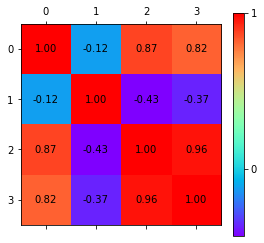

In [3]:
# we then visualise this using a heatmap! 

img = plt.matshow(cov_data, cmap=plt.cm.rainbow)
plt.colorbar(img, ticks=[-1, 0 ,1 ], fraction=0.05)
# we want to show the numerical value of the correlation coefficients too
for x in range(cov_data.shape[0]):
    for y in range(cov_data.shape[1]):
        plt.text(x, y, "%0.2f" % cov_data[x,y], size=10, color='black', ha='center', va='center')
plt.show
        

The important thing to take away from this is that the 0th, 2nd and 3rd variables are highly correlated, and the 1st is largely independent.

### Eigenvectors and Eigenvalues
Basically, if you have a matrix A, then $\nu$ is an eigenvector of A if A$\nu$ = $\lambda\nu$ for some scalar value of $\lambda$.  That’s pretty much all you need to remember.

Singular value decomposition is another matrix factorization algorithm. It expresses a matrix $A$ as a linear combination of rank 1 matrices. SVD of a matrix $A$ is given by

$\hspace{7em} A \;=\; U\sigma V$

where,
$U$ is a $R_{n\; x\; n}$ matrix, $V$ is a $R_{m\; x\; m}$ matrix and $\sigma$ is a $R_{n\; x \;m}$ diagonal matrix where diagonal values are called singular values and equal to square root of the eigenvalues. If the rank of the matrix $A$ is $r$, then only first $r$ values of singular values will be non-zero. Matrix $A$ can be represented as

$\hspace{7em} A = \Sigma_{i}^r\; U_{i}\sigma_{i}V_{i}^T$

Large value of $\sigma_i$ represents high contribution of $U_i*V_i^T$ to A, while low value indicates insignificant contribution to A.


## Linear Dimensionality Reduction

### PCA

The information contained in a feature is the amount of *variance* it contains, or can explain. If we can find a subset of features that contain most of the variance, we can capture most of the underlying information even after discarding the other features.  This is exactly what PCA does - it is essentially looking for a linear combination of variables able to explain the most variance in the dataset.  More formally, PCA is a projection based method which transforms data into a lower dimensional space.  This is extremely useful if your data has many dimensions, and you want to reduce it to two or three dimensions for visualising it.  It will also speed up your ML algorithms!  So this technique can be used for both visualisation and feature engineering! 

The principal components are those linear combinations that contain the maximum amount of variance.   The first principle component explains maximum variance in the dataset, the cecond principal component tries to explain the remaining variance in the dataset and is uncorrelated to the first principal component.  The third explains the remaining variance and so on.  Each principal component has a magnitude and direction, where the direction represents along which principal axes the data has the most variance and the magnitude is the amount of variance that principal component captures of the data when projected onto that axis.

The important aspect here is that the variables in each linear combination are correlated with each other.  The variables in subsequent principal components are again, correlated with each other, but *not* (or at least, minimally) correlated with those in the other principal components.  Each principle component has an associated weight, which indicates howe Principle components are orthogonal to each other.  

Principal Component Analysis (PCA) is an unsupervised method - it identifies the combination of attributes (principal components, or directions in the feature space) that account for the most variance in the *data*, regardless of any classes or labels.  Choosing the number of principal components will depend on the application - if you want to visualise the data, you want 2 or 3, if you are using the PCs as input to a subsequent algorithm, then you might want to increase this so that you can capture more of the variance.

Finally, we make an assumption that more variability in a particular direction correlates with explaining the behavior of the dependent variable. Lots of variability usually indicates signal, whereas little variability usually indicates noise. Thus, the more variability there is in a particular direction is, theoretically, indicative of something important we want to detect.

Before applying PCA, your data *must* be standardised! PCA is trying to find the components that maximise the variance, but if two components are on completely different scales, this can significantly skew the results.  For example: we have features of `weight` (in kg) and `height` (in metres).  If we do not standardise the data, then PCA will likely determine that the majority of the variance is held by `weight`, purely because it varies between, say, 40kg and 100kg (up to 60 kg difference!), and height only varies from 1.4m to 1.9m (so .5). 

Another cool thing that PCA can do is decorrelate your data, which is useful when you are wanting to apply another algorithm that relies on the data being independent (like ICA below).

As an aside, PCA has some similarities OLS, and there is a good explanation here https://cerebralmastication.com/2010/09/principal-component-analysis-pca-vs-ordinary-least-squares-ols-a-visual-explination/.   I've summarised it in the slides.

There are two ways we can implement PCA: either we decide that we want $n$ principle components, and see what that gives us, or, we can say that we want $x$% of the variance captured, and we want that in however many principle components it takes.


#### The Maths Bit 
You don't necessarily need to know this, but it is useful to understand.  

The first step is finding the direction of the principle component, or direction of the unit vector $\bf{u}_{1}$.  We do this by minimising the mean perpendicular distance from the line for all points in order to find the direction of $\bf{u}_{1}$: 

$\hspace{10em}\text{min}(\frac{1}{n}\Sigma^{n}_{i}(x^{T}_{i}x - (u^{T}_{1}x_i)^{2}))$

Finding this minimum is guaranteed to be found when $\bf{u}_{1}$ is an eigenvector of the covariance matrix.  So, our directions are given by the eigenvectors to the covariance matrix!  The magnitudes are the eigenvalues.  PCA, then, is the eigendecomposition of the covariance matrix!  The largest eigenvalue represents the first principle component, etc. 

#### PCA Steps Summary:

We take our original matrix and standardise it, $\bf{X}$, and, up to a constant, we have the covariance matrix $\bf{X^{T}X}$, we decompose this into $\bf{PDP^{-1}}$, where $\bf{P}$ is the matrix of eigenvectors, $D$ is the diagonal matrix of eigenvalues.  We then sort the eigenvalues $\lambda_i$ in descending order (and $P$ at the same time). We can call the sorted eigenvector matrix $P^*$.  Now, we can calculate the principle components of the data by taking the dot product of $\bf{X}$ and $\bf{P^{*}}$, according to $\bf{X^{*}}=\bf{XP^{*}}$.  Every entry in here is now a combination of original (standardised) variables, weighted by the weights in $\bf{P^{*}}$.

There is another, almost equivalent way of doing this, via singular value decomposition.  This works when the matrix is not diagonalisable.  The key point here is that a a matrix $\bf{X}$ can be decomposed into $\bf{X}=\bf{U\Sigma V}$, where $\bf{U}$ is the eigenvector of $\bf{X^TX}$, $\bf{V}$ the eigenvector of  $\bf{XX^{T}}$, and $\bf{\Sigma}$ contains the square roots of the eigenvalues.  I haven't covered this in detail here, but if you are interested, there is a good explanation here https://towardsdatascience.com/singular-value-decomposition-example-in-python-dab2507d85a0.  

### PCA: The dimensionality reduction bit

Let's look at some basic examples of where this could be used to reduce the dimensionality and visualise the output.  We'll try this on the iris dataset and the Boston housing dataset.

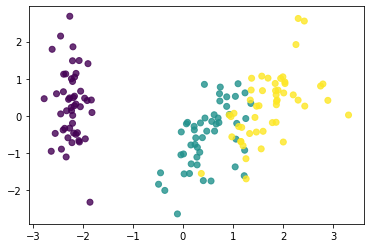

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
scaler = StandardScaler()

pca2 = PCA(n_components=2)
# Don't forget to standardise the data first! 
x_pca2 = pca2.fit_transform(scaler.fit_transform(iris.data))
plt.scatter(x_pca2[:, 0], x_pca2[:, 1], c=iris.target, alpha=0.8, marker='o')
plt.show()


Okay, so what can we tell from this?! Well, we've only looked at the first two principal components, and already here we can see that there is a large difference between the classes.  Also, we were able to reduce 4 features into 2!  Note that here, when we ran PCA, we did not supply any class information - that was added afterwards to the plot only, so we could visualise what it had picked up.  

Now, these don't necessarily mean much in their current form, but the point is that we can see a way to separate the data into different classes.  PCA is cool in that you can also go backwards and reconstruct the original data :) 

We also want to know how much of the total variance we've captured by using these two PCs.  Below, we find that we're capturing 95% of the variance!  If we look at which variables are contributing to the PCs, we can see that the first PC has strong contributions from three of the features, whilst the second PC is primarily from the sepal width.  These are important findings - it's telling us that the petal length, width, and sepal lengths are strongly correlated! 

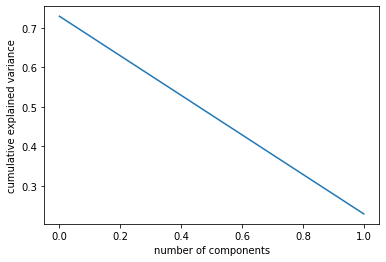

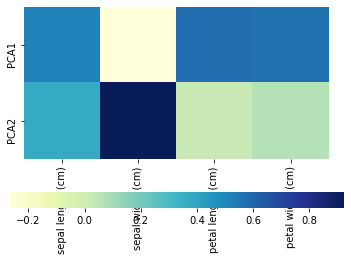

Total Variance Captured by Principle Components: 95.81320720000164%


In [6]:
import seaborn as sns
def plot_cumul_var(pcamodel):
    plt.bar(range(1,len(pcamodel.explained_variance_ )+1),pcamodel.explained_variance_ )
    plt.ylabel('Explained variance')
    plt.xlabel('Components')
    plt.plot(range(1,len(pcamodel.explained_variance_ )+1),
             np.cumsum(pcamodel.explained_variance_),
             c='red',
             label="Cumulative Explained Variance")
    plt.legend(loc='upper left')
    plt.show()


def plot_expl_var_ratio(pcamodel):
    plt.plot(pcamodel.explained_variance_ratio_)
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()

#PCA1 is at 0 in xscale

def plot_expl_variance(pcamodel):
    plt.plot(pcamodel.explained_variance_)
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()

def plot_heatmap(pcamodel, columns):
    ax = sns.heatmap(pcamodel.components_,
                     cmap='YlGnBu',
                     yticklabels=[ "PCA"+str(x) for x in range(1,pcamodel.n_components_+1)],
                     xticklabels=columns,
                     cbar_kws={"orientation": "horizontal"})
    ax.set_aspect("equal")
    plt.show()

# plot variance ratio
plot_expl_var_ratio(pca2)
# plot a heatmap showing which variables are contributing to each PC
plot_heatmap(pca2, list(iris.feature_names))
print('Total Variance Captured by Principle Components: {0}%'.format(pca2.explained_variance_ratio_.sum()*100.))


We can also have a look at another well known dataset, the Boston housing prices dataset.  The challenge with this dataset is to get the median value of homes, which is a real-valued, continuous variable. 

In [7]:
from sklearn.datasets import load_boston
import seaborn as sns
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
# remove the target variable from this 
boston_s = StandardScaler().fit_transform(boston)
boston_s = pd.DataFrame(boston_s, columns=boston_dataset.feature_names)

As a start, let's do the covariance matrix.  We can see from this that there are a few strong correlations (the off-diagonals that are red), and some negative correlations too (the purple ones).  This is good news for our PCA attempt, because we can see that there is some correlation there.

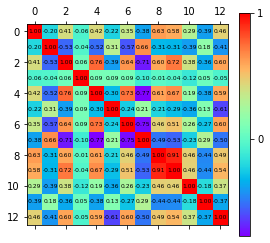

In [8]:
# we then visualise this using a heatmap! 

cov_data_boston = boston_s.corr()
img = plt.matshow(cov_data_boston, cmap=plt.cm.rainbow)
plt.colorbar(img, ticks=[-1, 0 ,1 ], fraction=0.05)
# we want to show the numerical value of the correlation coefficients too
for x in range(cov_data_boston.shape[0]):
    for y in range(cov_data_boston.shape[1]):
        plt.text(x, y, "%0.2f" % cov_data_boston.iloc[x,y], size=6, color='black', ha='center', va='center')
plt.show()

If we only want to visualise things, we can plot the first 2 (or 3) PCs.  However, unlike the iris dataset, we don't have target classes, but we do have a target continues variable.  But, we might also want to try including more PCs to see if that might explain more of the data (variance), especially if we want to plug this data into another model.

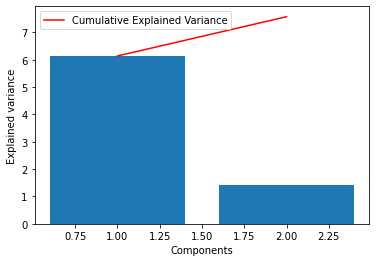

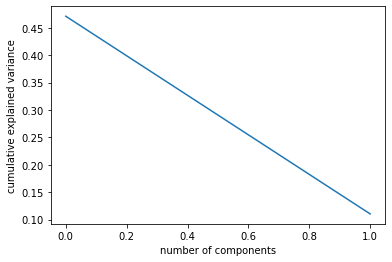

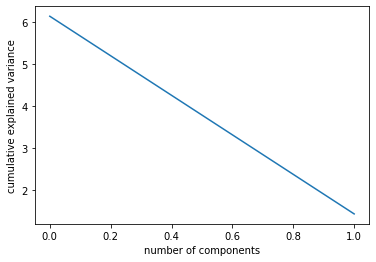

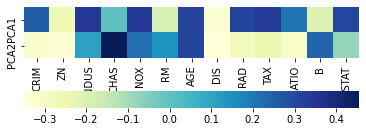

Total Variance Captured by Principle Components: 58.1547996048238%


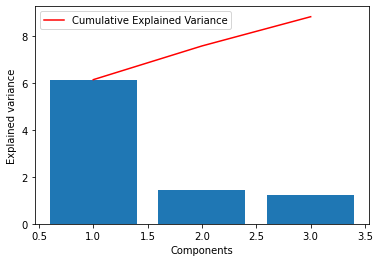

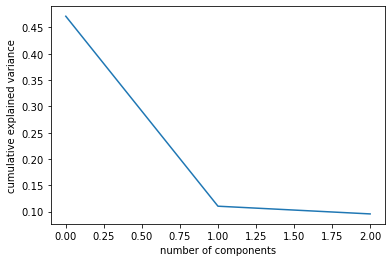

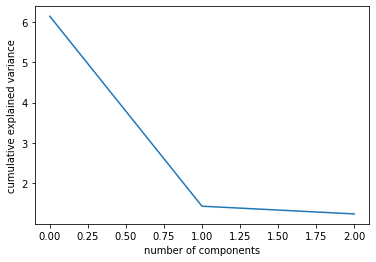

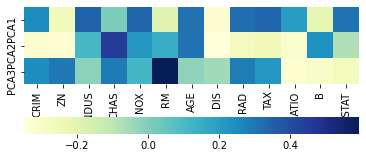

Total Variance Captured by Principle Components: 67.71338939748566%


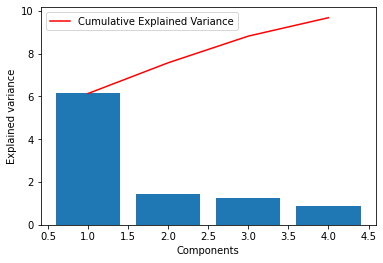

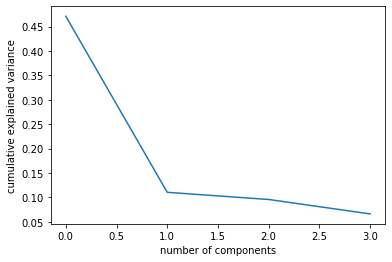

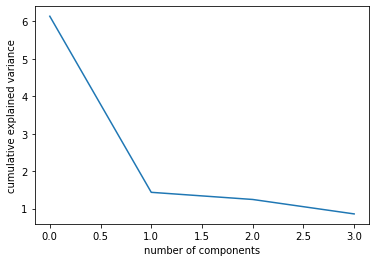

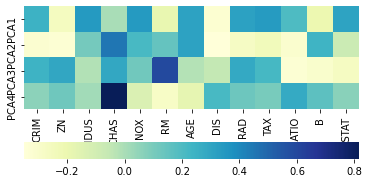

Total Variance Captured by Principle Components: 74.31012099832176%


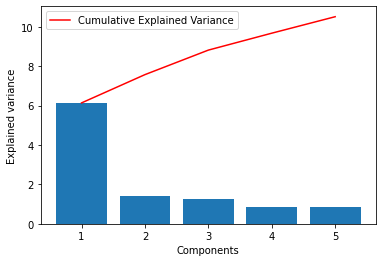

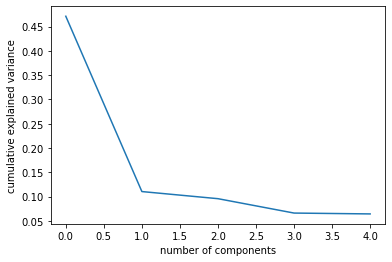

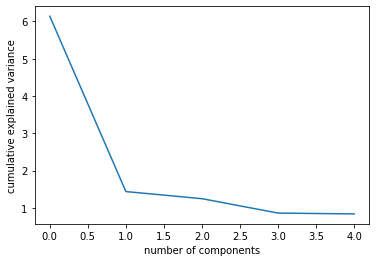

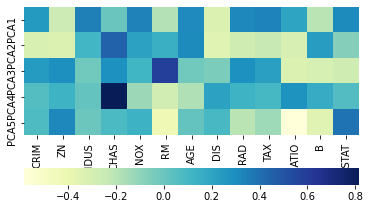

Total Variance Captured by Principle Components: 80.73178205045917%


In [9]:
# let's try this for a bunch of different PCs
for i in range(2, 6):
    pcamodel = PCA(n_components=i)
    pca = pcamodel.fit_transform(boston_s)
    plot_cumul_var(pcamodel)
    plot_expl_var_ratio(pcamodel)
    plot_expl_variance(pcamodel)
    plot_heatmap(pcamodel, list(boston.columns))
    print('Total Variance Captured by Principle Components: {0}%'.format(pcamodel.explained_variance_ratio_.sum()*100.))


There is *some* amount of information we can get from this plot.  It's difficult to tell... now, we can use some of the ideas we've covered in previous lectures - we could bin the median values (the target values), and then try this again! 

I'll leave this as an exercise to the reader (yessss always wanted to say that).

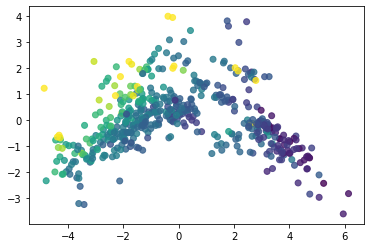

In [10]:
x_pca2 = pcamodel.fit_transform(scaler.fit_transform(boston_s))
plt.scatter(x_pca2[:, 0], x_pca2[:, 1], c=boston_dataset.target, alpha=0.8, marker='o')
plt.show()

### PCA: The ML bit
Right at the start, I said that we could use PCA as a way to speed up ML algorithms, or to use as direct inputs, not only for visualisation.  This is a pretty well-known example - we're going to build a logistic regression model on the output of our PCA model, and try to classify digits from the MNIST dataset.

In [11]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
mnist = fetch_openml('mnist_784')

In [12]:
X_train, X_test, y_train, y_test = train_test_split( mnist.data, mnist.target, test_size=0.25, random_state=42)
# remember we have to standardise our data first
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Here I've trained 6 different models, each one including more data (more principal components) than the previous one.  The final model includes everything.  You can see from the output that the score improves as more variance is included, but so does the training time! This is exactly why we're interested in PCA :) 

There's another interesting thing that happens here though - when we set it to include all components, the score from the model is actually worse than if we only included 95% of the variance.  Why?  This is because we likely have some noise in the data that is actually harming the model and producing spurious signals. 

In [13]:
import datetime as dt
# so, here, we're going to try this requiring that we have at least 95% of the variance captured.
# You can (and should) try playing around and trying different levels.
for variance in [0.5, 0.6, 0.7, 0.8, 0.95, 1.]:
    start_time = dt.datetime.now()
    if variance == 1:
        pca_mnist = PCA()
    else:
        pca_mnist = PCA(variance)
    pca_mnist.fit(X_train)

    X_train_p = pca_mnist.transform(X_train)
    X_test_p = pca_mnist.transform(X_test)
    # default solver is incredibly slow which is why it was changed to 'lbfgs'
    log_model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=250)
    log_model.fit(X_train_p, y_train)

    # Predict for One Observation (image)
    # print(log_model.predict(X_test_p[0].reshape(1,-1)))

    # Predict for One Observation (image)
    # print(log_model.predict(X_test_p[0:10]))
    # how well did we do? And how long did it take? 
    total_time = (dt.datetime.now() - start_time).total_seconds()
    print('Score: {0}, Variance {1}, PCs {2}, Training time seconds {3}'.format(
        log_model.score(X_test_p, y_test), 
        variance, 
        pca_mnist.n_components,
        total_time)
        )

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Score: 0.9014285714285715, Variance 0.5, PCs 0.5, Training time seconds 18.621893


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Score: 0.9093142857142857, Variance 0.6, PCs 0.6, Training time seconds 21.147314


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Score: 0.9168, Variance 0.7, PCs 0.7, Training time seconds 20.405239


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Score: 0.9229142857142857, Variance 0.8, PCs 0.8, Training time seconds 23.45439


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Score: 0.9219428571428572, Variance 0.95, PCs 0.95, Training time seconds 25.07725
Score: 0.9160571428571429, Variance 1.0, PCs None, Training time seconds 42.909934


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


One of the issues you might run into with PCA is the eigendecomposition (or SVD).  This requires everything to be loaded into memory and then does not scale well as the dataset increases in size.  We can use Randomised SVD to get an approximate decomposition.  It is an iterative method, and the principal components are updated during every iteration.  We won't need to go into the details, but it's useful to know that we can use this on larger datasets, but that it is *also* only an approximation. The approximation becomes more and more apparent as the dataset increases in size. 

I've not included an example on a large dataset in this notebook, but, if you look for the SUSY dataset online (it's about 900MB compressed), you can play around with it if you want.  On my machine (32GB), it runs the full PCA in about 3 seconds, whilst randomised and incremental are both over 10 seconds.  However, on that size of data, the difference the PCs is not huge.  It's normally slower to do the incremental or randomised version, but if you do not have enough memory, then that is a trade-off that needs to be made.

One more caveat on PCA - it is highly susceptible to outliers!!! 


### Factor Analysis
Factor analysis and PCA are similar in many respects, but there is a fundamental difference between them: PCA is a linear combination of variables; Factor Analysis attempts to reconstruct or identify a latent variable.  In other words, PCA is a linear combination of the observed variables, and FA the observed variables are linear combinations of unobserved, latent variables.

To make this a bit more concrete, imagine we have some number of variables in our dataset, $X_i$.  Our principal components will be calculated as:

$PC=w_1*X_1 + w_2*X_2 + ...$,

Where $w_i$ represent the weights. 

Whereas, in factor analysis, the $X_i$ are explained by the latent factor, $F$ (or, we might assume multiple latent factors $F_i$):
$X_i=a_i*F + \epsilon_i$,  (or, $X_i=a_{11}*F_1 + ... + a_{1j}F_j$, if we assume multiple latent factors)

(note this is essentially saying $\bf{X}=\bf{A}\bf{F}$, where $\bf{A}$ is a mixing matrix defining the relationship with the factors.)

Where $a_i$ are the weights for each variable, and $\epsilon_i$ are error terms.  The key part here is that each of the factors are *uncorrelated*.  

From a conceptual standpoint, this is a large difference.  Factor analysis assumes that there is some underlying variable (with a Guassian distribution) that is not measured directly, but is *causing* the values of the observed variables to have their values.  FA explains the *covariance* in the data, as opposed to the maximal *variance* from PCA.  From a mathematical perspective, another difference is that FA does not require orthogonality.  Technically, PCA is a specific type of factor analysis.

A big benefit to FA over PCA is that the outputs / factors are interpretable.  One of the ways in which this is achieved is by applying a rotation to the output factors.  I promised at the beginning of the course that I would not make the maths too heavy, so at this point, I'm not going to go too much further into the theory behind FA - unless you ask me too :)  All you really need to know is that at the end of applying factor analysis, you'll have an interpretable result - which I'll show in some examples below.


So, when would we use FA over PCA?  Or just FA in general?  

* Run FA if we want to test a hypothesis that there are latent factors causing observed variables.  This is often used in market research, social sciences and economics, where the answers might be indicative of some underlying feature.  Imagine you wanted to get an understanding of anxiety - you can ask a bunch of questions to get this, but there is no easy way to get this out in a single question.  Similarly, economic conditions might be caused by some unknown variable. 
* FA can be used for dimensionality reduction, but rather than finding maximum variance, it's finding groups of variables that are correlated, regardless of variance.
* If we just want to reduce the dimensionality, or reduce the features into independent variables, then we use PCA.

As an example, below is FA run on the iris dataset again.  Compare these results to those of PCA above.  It's still identifying a separation in the data, but the values and shapes are different.

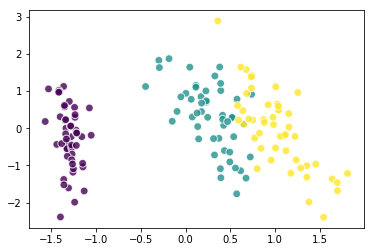

In [369]:
from sklearn.decomposition import FactorAnalysis
fact_2c = FactorAnalysis(n_components=2)
X_factor = fact_2c.fit_transform(scaler.fit_transform(iris.data))
plt.scatter(X_factor[:,0], X_factor[:,1], c=iris.target, alpha=0.8, s=60, marker='o', edgecolors='white')
plt.show()
 

It's useful to see how we might apply this to some survey data too.  We can have a quick look at airline passenger responses to how they rated different aspects of the airline experience.

In the factor analysis, we want to look at the answers to the survey and if there is a common thread.

In [370]:
df = pd.read_csv('AirlineSatisfaction/train.csv')
!pip install factor_analyzer  
from factor_analyzer import FactorAnalyzer

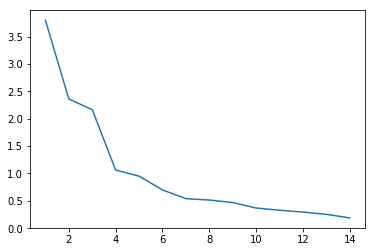

In [371]:
#Subset of the data containing the survey answers
survey_cols = ['Inflight wifi service', 
               'Departure/Arrival time convenient', 
               'Ease of Online booking',
              'Gate location',                        
              'Food and drink',
              'Online boarding',                    
              'Seat comfort',
              'Inflight entertainment',
              'On-board service',
              'Leg room service',
              'Baggage handling',
              'Checkin service',
              'Inflight service',
              'Cleanliness']
survey_data = df[survey_cols] 

# Now here, we can use the scikit learn version of FactorAnalysis, *BUT*, it does
# not include a rotation of the output matrix, meaning that 
# the components do not give an easily interpretable result... 
# instead, we will use the factor_analyzer package.

# how many factors should we be using? Let's check the scree plot...
fa = FactorAnalyzer()
fa.fit(survey_data)#scaler.fit_transform(x))

eig_vals, var = fa.get_eigenvalues()
plt.plot(range(1,survey_data.shape[1]+1),eig_vals)

Given this steep drop-off, we can probably decide on 3 or 4 factors.  (The plot shows that the first factor has an eigenvalue of about 3.8, all the way to the fourth of 1.0)

The output we get from the loadings is the weightings of each variable contributing to a factor.  Columns represent the factors, and the rows are the contribution from each variable.

In [372]:
fa = FactorAnalyzer(3, rotation='varimax')
fa.fit(survey_data)

print(fa.loadings_)

[[ 0.16826952  0.12827119  0.75809134]
 [-0.02950837  0.05968117  0.50138365]
 [ 0.03023106  0.02091436  0.93277525]
 [-0.0338282  -0.03231121  0.50404385]
 [ 0.75263893  0.01094635  0.00616734]
 [ 0.39545345  0.1138114   0.35906543]
 [ 0.78999048  0.08146326  0.02725824]
 [ 0.7456934   0.46674984  0.01203424]
 [ 0.09388069  0.70115382  0.02900913]
 [ 0.07445487  0.48144209  0.08065029]
 [ 0.02346305  0.76474833  0.02769279]
 [ 0.14351222  0.28418169  0.02888187]
 [ 0.01813146  0.79977083  0.01825226]
 [ 0.85842045  0.08814824 -0.00170807]]


As you can see here, the most important variables contributing to factor 1 are the 0.75, 0.79, 0.75 and 0.86, corresponding to "Food and Drink", "seat comfort", "Inflight entertainment" and "cleanliness".   Here we can ask if these four variables have anything in common - what do they represent?! Hospitality? That seems reasonable.  This was not obvious from the original dataset or the questions asked - it is a latent variable.

In [373]:
!pip install pingouin
import pingouin as pg
#Create the factors
factor1 = df[['Food and drink', 'Seat comfort', 'Inflight entertainment', 'Cleanliness']]
factor2 = df[['On-board service', 'Baggage handling', 'Inflight service']]
factor3 = df[['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location']]
#Get cronbach alpha
factor1_alpha = pg.cronbach_alpha(factor1)
factor2_alpha = pg.cronbach_alpha(factor2)
factor3_alpha = pg.cronbach_alpha(factor3)
print(factor1_alpha, factor2_alpha, factor3_alpha)

  Running setup.py bdist_wheel for pingouin: started
  Running setup.py bdist_wheel for pingouin: finished with status 'done'
  Stored in directory: C:\Users\kungr\AppData\Local\pip\Cache\wheels\02\92\32\0ed9ac4a9407227f3f070170a26d05f07d6f2a8a68989a8ac3
  Running setup.py bdist_wheel for outdated: started
  Running setup.py bdist_wheel for outdated: finished with status 'done'
  Stored in directory: C:\Users\kungr\AppData\Local\pip\Cache\wheels\fd\7c\ef\814f514d31197310872b5abf353feb8fef9d67ee658e1e7e39
  Running setup.py bdist_wheel for littleutils: started
  Running setup.py bdist_wheel for littleutils: finished with status 'done'
  Stored in directory: C:\Users\kungr\AppData\Local\pip\Cache\wheels\53\16\9f\ac67d15c40243754fd73f620e1b9b6dedc20492ecc19a2bae1
Successfully built pingouin outdated littleutils
  Found existing installation: scipy 1.1.0
    Uninstalling scipy-1.1.0:
      Successfully uninstalled scipy-1.1.0


xarray 0.16.0 has requirement setuptools>=41.2, but you'll have setuptools 40.6.3 which is incompatible.
Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\kungr\\AppData\\Local\\Temp\\pip-uninstall-7ik2qf_a\\users\\kungr\\anaconda3\\lib\\site-packages\\scipy\\cluster\\_hierarchy.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



ModuleNotFoundError: No module named 'pingouin'

### LDA


Linear Discriminant Analysis (LDA) is another linear transformation technique that was developed as a classifier (in one of the previous notebooks, the one on diabetes, we used LDA!), but is commonly used for dimensionality reduction.  It is similar to PCA, but the key difference is that it is *supervised*. PCA maximises variance within the data, regardless of class labels.  LDA tries to find the linear discriminants (the LDA equivalent of principal components) that maximises the separation between *classes* within the data.  

LDA outputs linear combinations of the input features, like PCA, but it does so by minimising a different object fuction.  Unlike PCA, it is itself a classification technique, and should not be used as an input into a further regression problem. 

Note that for LDA you do not have to apply standardisation, although it doesn't hurt :)   When using LDA for *classification*, the algorithm assumes that the data is normally distributed, statistically independent features, and that every *class* has identical covariance matrices.  However, this is less of an issue if it is being used for dimensionality reduction (in particular, the statistical independence). 

Why would we use PCA on multiclass problems?  LDA is built specifically to find differences in classes, as opposed to PCA looking at the data directly.  Interestingly, if there are few samples per class, then PCA outperforms LDA.  Although, in many cases, the two are used together - PCA is done to reduce the dimensionality, and the outputs are fed into an LDA.

Many of the same shortcomings of PCA are apparent here - the data must be linear, if the data is too big, then it doesn't converge and we need to move onto other algorithms (or regularised versions of LDA).  


Again, the same metrics can be used to check how this is performing - scree plots, the eigenvalues, vectors, and the explained variance.


#### LDA: The Maths bit

This is of course another linear matrix algebra problem.  We're again doing eigendecomposition, but, the setup is slightly different.  Instead of how we did it in PCA, where we performed this on the covariance matrix, we do this on the product of the in-between class and within-class scatter matrices (scatter matrices are estimates of covariance matrices).  Essentially we're doing this over the within and in-between class covariances.  

So how we do this... Imagine we are given an $nXm$ input matrix, $\bf{X}$, with $n$ features, and $c$ classes.

First, we calculate the mean vector for each class and feature for this dataset,

$\bar{\bf{\mu}}_i = \frac{1}{n_i}\Sigma^{n}_{x\in D_i}\bf{x}_j$

Then, we calculate the two scatter matrices:

1) within class

For each class, $c$, we calculate a scatter matrix

$S_i=\Sigma_{\bf{x}\in c_i}^{n}(\bf{x}-\bar{\bf{\mu}}_i)(\bf{x}-\bar{\bf{\mu}}_i)^T$,

and combine this into our within-class scatter matrix:

$S_W=\Sigma S_i$


2) between-class

$S_B=\Sigma_{i=1}^{c}N_i(\bar{\bf{\mu}}_i-\bar{\bf{\mu}})(\bar{\bf{\mu}}_i-\bar{\bf{\mu}})^T$  

Where $N_i$ is the sample size of class $i$, and $\bar{\bf{\mu}}$ is the overall mean (across all classes).


Then we get to the part that we're familiar with  from PCA: the eigendecomposition of $S_W^{-1}S_B$.  This will provide a set of eigenvectors, $\bf{e}_c$ and eigenvalues, $\lambda_c$.  As for PCA, we sort these eigenvectors by descending eigenvalues and choose to keep the $k$ highest eigenvalues.  This forms an output matrix $\bf{W}$, which we then use to transform our data into the new subspace.


#### LDA vs PCA example

This short example highlights the difference quite well.  PCA and LDA both are able to project the dataset into 2 components, but we can see from the plots that whilst PCA is finding maximal variance, LDA (specifically LD1) has found an axis that is separating the *classes*.

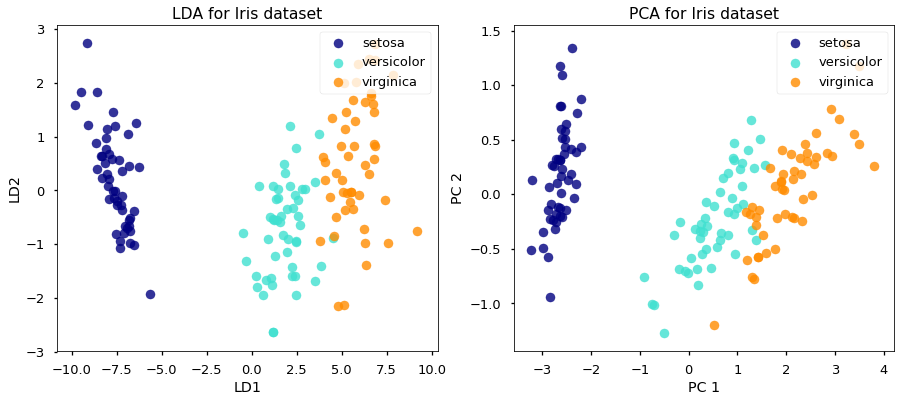

In [374]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import LabelEncoder

label_dict = {1: 'Setosa', 2: 'Versicolor', 3:'Virginica'}


enc = LabelEncoder()
label_encoder = enc.fit(iris.target)
y = label_encoder.transform(iris.target) + 1
   
lda = LDA(n_components=2)
X_lda = lda.fit_transform(iris.data, y)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(iris.data)


target_names = iris.target_names
with plt.style.context('seaborn-talk'):
    fig, axes = plt.subplots(1,2,figsize=[15,6])
    colors = ['navy', 'turquoise', 'darkorange']
    for color, i, target_name in zip(colors, [1, 2, 3], target_names):
        axes[0].scatter(X_lda[y == i, 0], X_lda[y == i, 1], alpha=.8, label=target_name, color=color)
        axes[1].scatter(X_pca[y == i, 0], X_pca[y == i, 1], alpha=.8, label=target_name, color=color)
    axes[0].title.set_text('LDA for Iris dataset')
    axes[1].title.set_text('PCA for Iris dataset')
    axes[0].set_xlabel('LD1')
    axes[0].set_ylabel('LD2')
    axes[1].set_xlabel('PC 1')
    axes[1].set_ylabel('PC 2')
    axes[0].legend(loc='upper right', fancybox=True)
    axes[1].legend(loc='upper right', fancybox=True)


Here is another example of LDA vs PCA on the wine dataset (https://archive.ics.uci.edu/ml/datasets/wine).  (Also, I'm so sorry this is not a real world dataset).

(The wine dataset contains a bunch of attributes detailing the chemical analysis of wines from Italy.  All wines were from the same region, but produced by different people.  The goal is to figure out which chemical attributes come from which vineyard).

How do we explain the extreme differences between the two results?   PCA is finding the features with the most variance, but, the features with the most variance might actually be the same for each *class*.  As an example, imagine we were looking at some sports teams and trying to predict performance based on the physical attributes of their players.  Now, imagine that in this team, there are players ranging in height from 1.5 metres to 2 metres in every team, without any exceptions.  Now, height might have the most variance over all, but when comparing teams, they are all exactly the same.  PCA will focus on this, but it's actually useless for separating *classes*.  

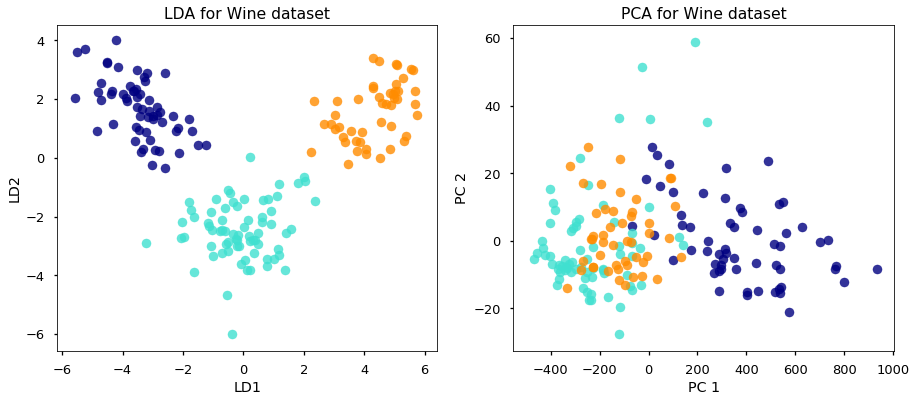

In [375]:
wine = datasets.load_wine()
X = wine.data
y = wine.target
target_names = wine.target_names

X_r_lda = LDA(n_components=2).fit(X, y).transform(X)
X_r_pca = PCA(n_components=2).fit(X).transform(X)

with plt.style.context('seaborn-talk'):
    fig, axes = plt.subplots(1,2,figsize=[15,6])
    colors = ['navy', 'turquoise', 'darkorange']
    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        axes[0].scatter(X_r_lda[y == i, 0], X_r_lda[y == i, 1], alpha=.8, label=target_name, color=color)
        axes[1].scatter(X_r_pca[y == i, 0], X_r_pca[y == i, 1], alpha=.8, label=target_name, color=color)
    axes[0].title.set_text('LDA for Wine dataset')
    axes[1].title.set_text('PCA for Wine dataset')
    axes[0].set_xlabel('LD1')
    axes[0].set_ylabel('LD2')
    axes[1].set_xlabel('PC 1')
    axes[1].set_ylabel('PC 2')

### ICA

Independent component analysis takes a multivariate signal and decomposes it into additive components by maximising the independence between each component.  Usually ICA is used for exactly that - separating superimposed signals (or blind source separation).  However, it is also good for reducing dimensionality.  It does a similar thing to PCA and FA in that it is breaking down a dataset into some lower dimensional basis, just using different criteria.  

It is classically used to separate mixed signals (a problem known as blind source separation), as in the example below:


The cocktail party effect is the phenomenon of the brain's ability to focus one's auditory attention (an effect of selective attention in the brain) on a particular stimulus while filtering out a range of other stimuli, as when a partygoer can focus on a single conversation in a noisy room.[1][2][3] Listeners have the ability to both segregate different stimuli into different streams, and subsequently decide which streams are most pertinent to them.[4] Thus, it has been proposed that one's sensory memory subconsciously parses all stimuli and identifies discrete pieces of information by classifying them by salience.[5] This effect is what allows most people to "tune into" a single voice and "tune out" all others. It may also describe a similar phenomenon that occurs when one may immediately detect words of importance originating from unattended stimuli, for instance hearing one's name among a wide range of auditory input.[6][7]


ICA has the same form as Factor Analysis, where each variable is assumed to be a linear combination of any number of unknown, latent variables, (remember $X_i=b_{11}*F_1 + ... + b_{1j}F_j$).  However, the big difference is that the factors are no longer assumed to be uncorrelated, but *statistically independent*.   This is important - if two variables are independent, that implies that there is no correlation. However, no correlation does not imply that the variables are independent.  

What the statistical independence criteria implies is that we need to apply a whitening transformation to the data first.  This removes any correlations in the dataset (although, as noted above, this is not sufficient for independence).  This can be done by using PCA first.

One more key aspect of ICA, is the assumption that the factors are *non-Gaussian*.  So, if the original latent factors are normally distributed, then ICA will not be effective. 

Again, I said I wouldn't do too much of the in-depth maths, but this stuff is awesome if you want to talk about it!  It's based on entropy (which is arguably one of the coolest bits of physics) and information theory.  In short, by maximising entropy, ICA finds a projection of the data that is as far from Gaussian as possible, which is the same as finding the maximal independence.

Let's take a look at some of the signal separation stuff.  The classic example is, like the cocktail party problem, taking multiple audio signals and unmixing them (see here https://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_blind_source_separation.html#sphx-glr-auto-examples-decomposition-plot-ica-blind-source-separation-py ).  I thought it would be fun to do our own one though.  

So, I've included a picture of me with my fireman's hat on (this is for fighting fires in production systems at work), and another picture with some flames.  We read them both in (converted to grayscale to make it easier), and then mix the two pictures together.  This creates an image of Tim and fire.  After this, we apply ICA to try and separate the two source images from the mixed ones.  It works out quite well :) 

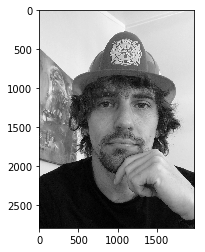

In [376]:
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])


img1 = mpimg.imread('147FD967-AD62-41C9-BBDE-192A4A4089A3_small.jpg')
gray1 = rgb2gray(img1)

img2 = mpimg.imread('flames_2.jpg')
gray2 = rgb2gray(img2).T[213:, 13:]

plt.imshow(gray1, cmap=plt.get_cmap('gray'))
plt.show()


# Tim and his fireman's hat

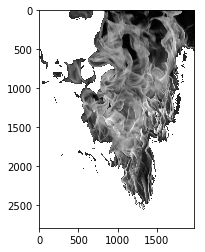

In [377]:

plt.imshow(gray2, cmap=plt.get_cmap('gray'))
plt.show()

# EVERYTHING IS ON FIRE

Here is the bit that then mixes the two images, and then does the separation.

In [378]:
S = []
for i, pic in enumerate([gray1, gray2]):
    s = np.ravel(pic)
    S.append(s)
S = np.asarray(S).T

# mixing matrix
# A = np.random.randn(2, 2)

A = np.array([[0.5, 0.5], [-0.5, 0.5]])

        
# mixed data
X = np.dot(S, A.T)
        
# normalize mixed data
X_standard_scaler = StandardScaler()
X_norm = X_standard_scaler.fit_transform(X)
        
# compute ICA
print("starting ICA")
ica = FastICA(n_components=2, random_state=1)
S_ = ica.fit_transform(X_norm)  # estimated sources
A_ = ica.mixing_  # estimated mixing matrix
        


starting ICA


This is Tim on fire.... 

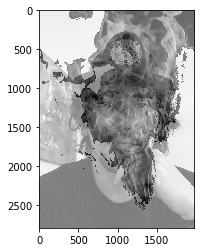

In [379]:
x = X[:,0]
plt.imshow( np.reshape(x, (gray1.shape)), cmap='gray' )

And now we put out the fire

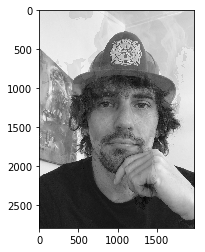

In [380]:
#for i in range(1):
s = S_[:,1]
s = scaler.fit_transform(s.reshape( (-1, 1) ) )
plt.imshow( np.reshape(s, (gray1.shape)), cmap='gray' )

#### Eigenfaces
One more example!  Eigenfaces - where we use PCA to decompose pictures of faces into the principal components (obviously via eigendecomposition mentioned above).  The results are awesome and terrifying at the same time :)  The below also includes Factor Analysis.  It is showing what happens when we learn the components, and then project a new picture of a face onto this basis.  It pics up the parts you might expect hold the most information about a face - eyes, nose, mouth.

This is taken straight from sklearn ;)  https://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html#sphx-glr-auto-examples-decomposition-plot-faces-decomposition-py

Dataset consists of 400 faces
Extracting the top 6 Eigenfaces - PCA using randomized SVD...
done in 0.017s
Extracting the top 6 Factor Analysis components - FA...
done in 0.152s


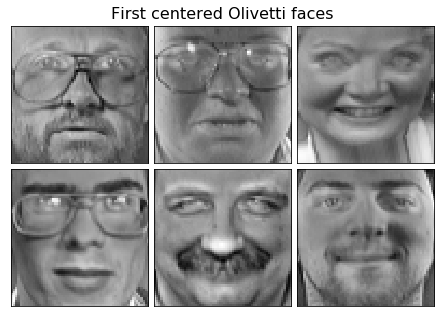

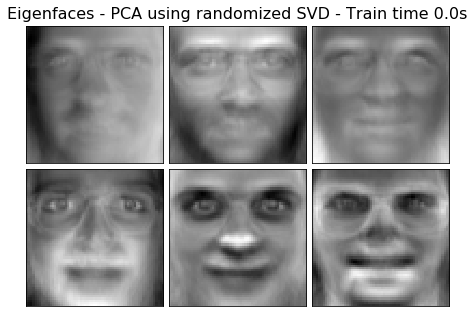

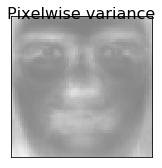

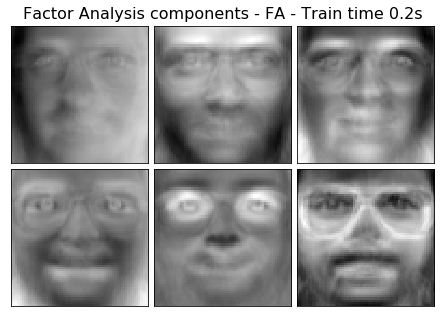

In [381]:
# #############################################################################
# Load faces data
from numpy.random import RandomState
from sklearn import decomposition
import time
from sklearn.datasets import fetch_olivetti_faces
n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (64, 64)
rng = RandomState(0)
faces_bunch = fetch_olivetti_faces(shuffle=True, random_state=rng)

faces = faces_bunch.data
n_samples, n_features = faces.shape

# global centering
faces_centered = faces - faces.mean(axis=0)

# local centering
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

print("Dataset consists of %d faces" % n_samples)


def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=cmap,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)
    
estimators = [
    ('Eigenfaces - PCA using randomized SVD',
     decomposition.PCA(n_components=n_components, svd_solver='randomized',
                       whiten=True),
     True),
    ('Factor Analysis components - FA',
     decomposition.FactorAnalysis(n_components=n_components, max_iter=20),
     True),]

plot_gallery("First centered Olivetti faces", faces_centered[:n_components])

# #############################################################################
# Do the estimation and plot it

for name, estimator, center in estimators:
    print("Extracting the top %d %s..." % (n_components, name))
    t0 = dt.datetime.now()
    data = faces
    if center:
        data = faces_centered
    estimator.fit(data)
    train_time = (dt.datetime.now() - t0).total_seconds()
    print("done in %0.3fs" % train_time)
    if hasattr(estimator, 'cluster_centers_'):
        components_ = estimator.cluster_centers_
    else:
        components_ = estimator.components_

    # Plot an image representing the pixelwise variance provided by the
    # estimator e.g its noise_variance_ attribute. The Eigenfaces estimator,
    # via the PCA decomposition, also provides a scalar noise_variance_
    # (the mean of pixelwise variance) that cannot be displayed as an image
    # so we skip it.
    if (hasattr(estimator, 'noise_variance_') and
            estimator.noise_variance_.ndim > 0):  # Skip the Eigenfaces case
        plot_gallery("Pixelwise variance",
                     estimator.noise_variance_.reshape(1, -1), n_col=1,
                     n_row=1)
    plot_gallery('%s - Train time %.1fs' % (name, train_time),
                 components_[:n_components])

plt.show()
    

Okay, one more example of the effective of dimensionality reduction.  

So, in all of these methods, we find some projection of the data in a lower dimension.  In doing so, we *try* to keep as much of the variance (information) about the data as possible, but, of course, the lower the dimension, the more we lose.  Now, we can take a dataset and calculate what this projection should be (the factors, PCs, etc).  Then, we can go in *reverse* to see what we lost.  What does this mean?  We take our data, we project it into a lower dimension (lose some info), and then apply the inverse transform.  

It's easiest when shown on some data.... 

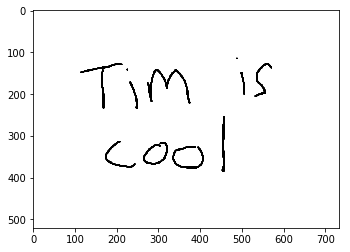

In [382]:
def plot_components():
    pass


def run_pca(data_in, n_components):
    fig, ax = plt.subplots(1,1)
    pca = PCA(n_components=n_components)

    pca.fit(data_in)

    data_tx = pca.fit_transform(data_in)
    data_restored = pca.inverse_transform(data_tx)
    ax.imshow(data_restored, cmap='gray')
    plt.show()

def run_ica(data_in, n_components):
    fig, ax = plt.subplots(1,1)
    ica = FastICA(n_components=n_components)

    ica.fit(data_in)

    data_tx = ica.fit_transform(data_in)
    data_restored = ica.inverse_transform(data_tx)
    ax.imshow(data_restored, cmap='gray')
    plt.show()
    
    
tim1 = mpimg.imread('147FD967-AD62-41C9-BBDE-192A4A4089A3_small.jpg')

tim = mpimg.imread('tim_is_cool.png')
tim = rgb2gray(tim)
# tim = scaler.fit_transform(tim)

plt.imshow(tim, cmap='gray')



Now we run PCA on this image with different numbers of components and see what happens... As you can see, the fewer components, the less information is kept.  What is awesome is that we're able to get a legible copy using only 4 or 5 components - from an image of a much, much bigger size.  How awesome, right? :) 

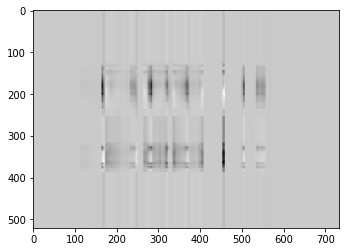

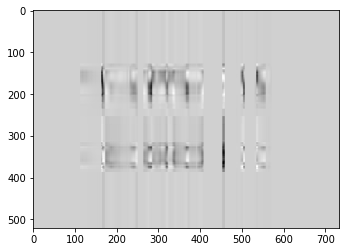

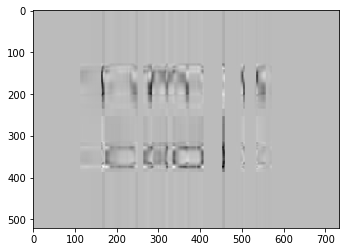

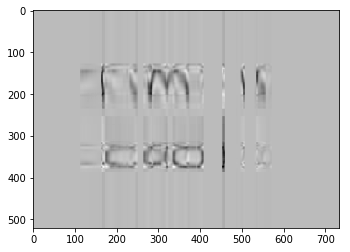

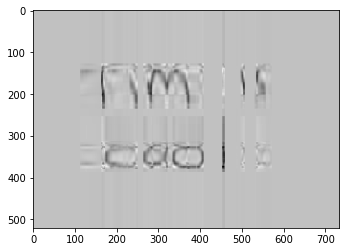

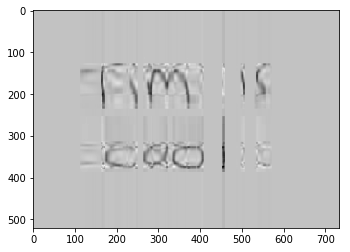

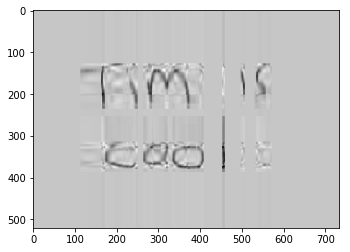

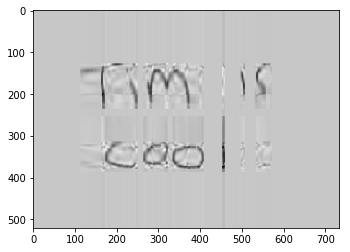

In [383]:
for i in range(2, 10):
    run_pca(tim, i)

We can do a similar thing for ICA, and LDA, and FA if you want :) 

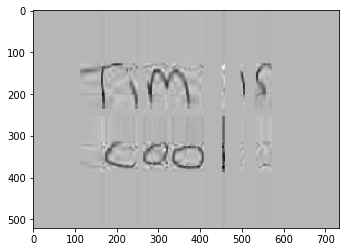

In [384]:
run_ica(tim, 10)